In [1]:
# set cwd 
import os
import pandas as pd
from pathlib import Path
os.chdir('C:/Users/prins/GitHub/Human1_RPE-PR') 

In [2]:
df=pd.read_excel(Path().cwd() /'jupyter/RPE-PR/figures/summary_FBA_light_dark_old_new_RPE-PR.xlsx')

In [3]:
df_long=df.melt(col_level=0, id_vars=df.columns[0:4],value_vars=df.columns[4:])
df_long_variables = pd.DataFrame([string.split() for string in df_long["variable"]],columns=['model','amino_acids','dark/light','old/new'])
df_long2=pd.concat([df_long_variables,df_long],axis=1)
df_long2

,model,amino_acids,dark/light,old/new,oxygen,glucose,lactate,oxygen RPE -> PR,variable,value
0,H1,aas,dark,old,anaerobic,no glucose,lactate efflux > 0,fixed,H1 aas dark old,0.587887
1,H1,aas,dark,old,anaerobic,no glucose,lactate efflux > 0,unlimited,H1 aas dark old,0.587887
2,H1,aas,dark,old,anaerobic,no glucose,lactate efflux > x,fixed,H1 aas dark old,NaN
3,H1,aas,dark,old,anaerobic,no glucose,lactate efflux > x,unlimited,H1 aas dark old,NaN
4,H1,aas,dark,old,anaerobic,no glucose,unlimited lactate exchange,fixed,H1 aas dark old,0.587887
...,...,...,...,...,...,...,...,...,...,...
859,CS,no_aas,light,new,unlimited oxygen,unlimited glucose,lactate efflux > 0,unlimited,CS no_aas light new,1000.000000
860,CS,no_aas,light,new,unlimited oxygen,unlimited glucose,lactate efflux > x,fixed,CS no_aas light new,1000.000000
861,CS,no_aas,light,new,unlimited oxygen,unlimited glucose,lactate efflux > x,unlimited,CS no_aas light new,1000.000000
862,CS,no_aas,light,new,unlimited oxygen,unlimited glucose,unlimited lactate exchange,fixed,CS no_aas light new,1000.000000


In [4]:
df_test = df_long2.loc[(df_long2['old/new'] == 'new') & (df_long2['lactate'] =='unlimited lactate exchange') & (df_long2['oxygen RPE -> PR'] =='fixed ')  ]
df_test

,model,amino_acids,dark/light,old/new,oxygen,glucose,lactate,oxygen RPE -> PR,variable,value
112,H1,aas,dark,new,anaerobic,no glucose,unlimited lactate exchange,fixed,H1 aas dark new,0.937927
118,H1,aas,dark,new,anaerobic,limited glucose,unlimited lactate exchange,fixed,H1 aas dark new,9.297927
124,H1,aas,dark,new,anaerobic,unlimited glucose,unlimited lactate exchange,fixed,H1 aas dark new,1000.000000
130,H1,aas,dark,new,limited oxygen,no glucose,unlimited lactate exchange,fixed,H1 aas dark new,18.755186
136,H1,aas,dark,new,limited oxygen,limited glucose,unlimited lactate exchange,fixed,H1 aas dark new,27.115186
...,...,...,...,...,...,...,...,...,...,...
838,CS,no_aas,light,new,limited oxygen,limited glucose,unlimited lactate exchange,fixed,CS no_aas light new,16.647310
844,CS,no_aas,light,new,limited oxygen,unlimited glucose,unlimited lactate exchange,fixed,CS no_aas light new,1000.000000
850,CS,no_aas,light,new,unlimited oxygen,no glucose,unlimited lactate exchange,fixed,CS no_aas light new,1000.000000
856,CS,no_aas,light,new,unlimited oxygen,limited glucose,unlimited lactate exchange,fixed,CS no_aas light new,1000.000000


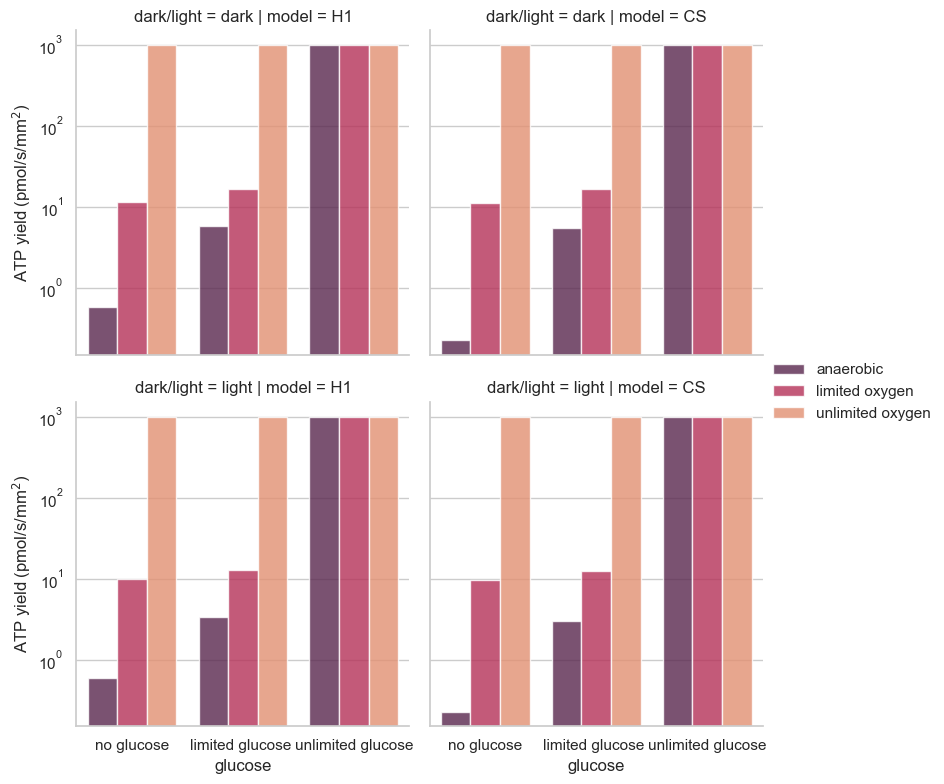

In [5]:
# FIG
import matplotlib.pyplot as plt
import seaborn as sns


df_fig =  df_long2.loc[(df_long2['old/new'] == 'old')\
                       & (df_long2['oxygen RPE -> PR']=='unlimited') \
                       & (df_long2['lactate']=='unlimited lactate exchange')\
                       & (df_long2['amino_acids']=='aas')]


sns.set_theme(style="whitegrid")

# Draw a nested barplot by species and sex
g = sns.catplot(
    data=df_fig, kind="bar",
    x="glucose", y="value", hue="oxygen", col ="model", row='dark/light',
    errorbar="sd", palette="rocket", alpha=.8, height=4,
)
g.despine(left=False)
g.set_axis_labels("glucose","ATP yield (pmol/s/mm$^{2}$)")
g.legend.set_title("")
plt.yscale('log')

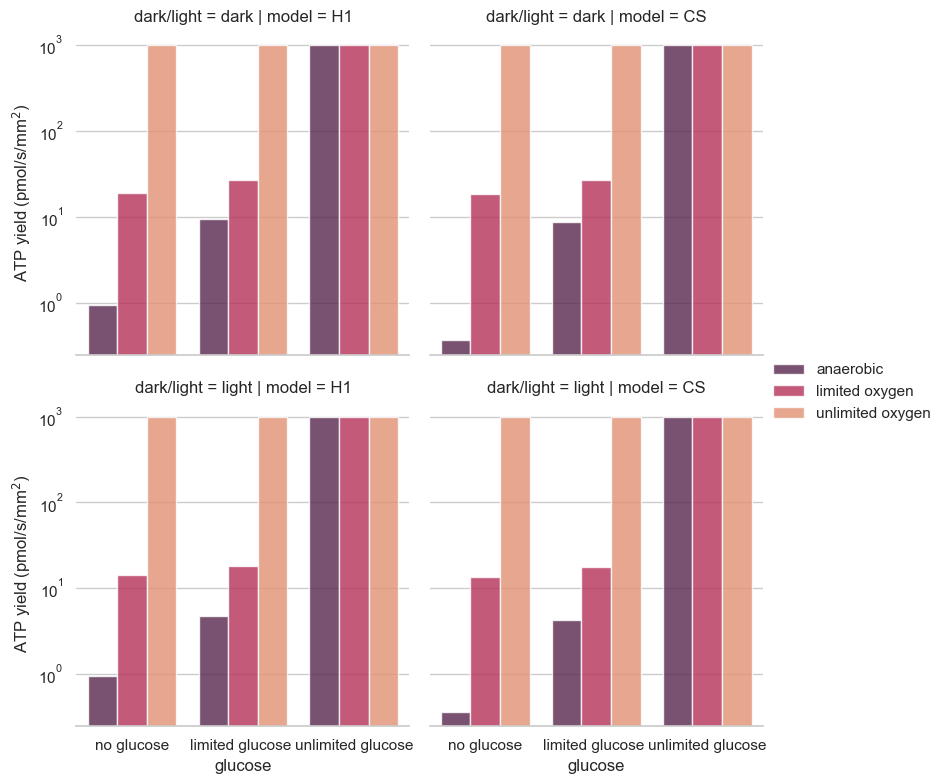

In [6]:
df_fig =  df_long2.loc[(df_long2['old/new'] == 'new')\
                       & (df_long2['oxygen RPE -> PR']=='unlimited') \
                       & (df_long2['lactate']=='unlimited lactate exchange')\
                       & (df_long2['amino_acids']=='aas')]


sns.set_theme(style="whitegrid")

# Draw a nested barplot by species and sex
g = sns.catplot(
    data=df_fig, kind="bar",
    x="glucose", y="value", hue="oxygen", col ="model", row='dark/light',
    errorbar="sd", palette="rocket", alpha=.8, height=4,
)
g.despine(left=True)
g.set_axis_labels("glucose","ATP yield (pmol/s/mm$^{2}$)")
g.legend.set_title("")
plt.yscale('log')

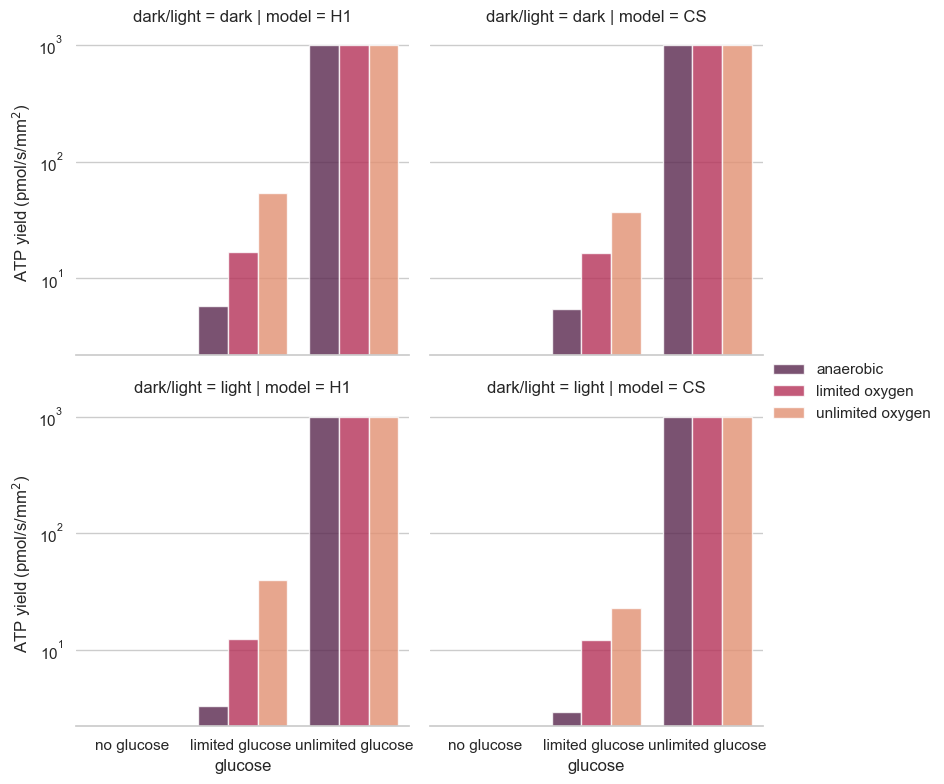

In [7]:
df_fig =  df_long2.loc[(df_long2['old/new'] == 'old')\
                       & (df_long2['oxygen RPE -> PR']=='unlimited') \
                       & (df_long2['lactate']=='lactate efflux > x')\
                       & (df_long2['amino_acids']=='aas')]

# sns.set_theme(style="whitegrid", palette="colorblind")

g = sns.catplot(
    data=df_fig, kind="bar",
    x="glucose", y="value", hue="oxygen", col ="model", row='dark/light',
    errorbar="sd", palette="rocket", alpha=.8, height=4
)
g.despine(left=True)
g.set_axis_labels("glucose", "ATP yield (pmol/s/mm$^{2}$)")
g.legend.set_title("")
plt.yscale('log')
#plt.xticks(rotation=20)

In [8]:
g.axes[0, 0]

<AxesSubplot: title={'center': 'dark/light = dark | model = H1'}, ylabel='ATP yield (pmol/s/mm$^{2}$)'>

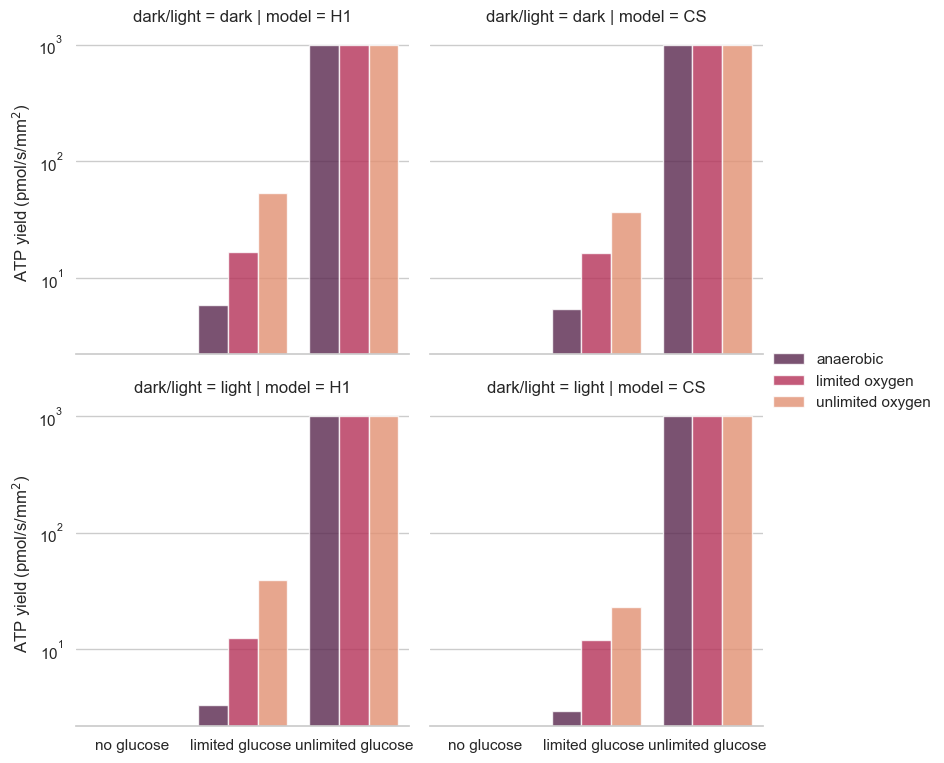

In [12]:
df_fig =  df_long2.loc[(df_long2['old/new'] == 'old')\
                       & (df_long2['oxygen RPE -> PR']=='unlimited') \
                       & (df_long2['lactate']=='lactate efflux > x')\
                       & (df_long2['amino_acids']=='aas')]


sns.set_theme(style="whitegrid", palette="colorblind")

# Draw a nested barplot by species and sex
g = sns.catplot(
    data=df_fig, kind="bar",
    x="glucose", y="value", hue="oxygen", col ="model", row='dark/light',
    errorbar="sd", palette="rocket", alpha=.8, height=4
)
g.despine(left=True)
g.set_axis_labels("", "ATP yield (pmol/s/mm$^{2}$)")
g.legend.set_title("")
plt.yscale('log')

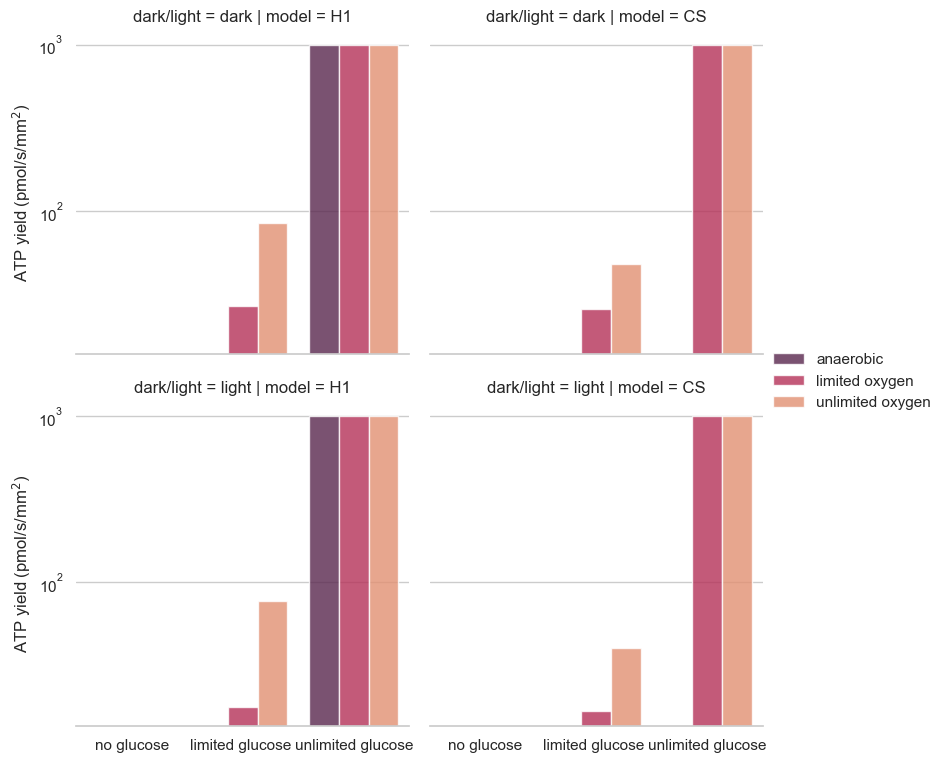

In [11]:
df_fig =  df_long2.loc[(df_long2['old/new'] == 'new')\
                       & (df_long2['oxygen RPE -> PR']=='fixed ') \
                       & (df_long2['lactate']=='lactate efflux > x')\
                       & (df_long2['amino_acids']=='aas')]


sns.set_theme(style="whitegrid")

# Draw a nested barplot by species and sex
g = sns.catplot(
    data=df_fig, kind="bar",
    x="glucose", y="value", hue="oxygen", col ="model", row='dark/light',
    errorbar="sd", palette="rocket", alpha=.8, height=4
)
g.despine(left=True)
g.set_axis_labels("", "ATP yield (pmol/s/mm$^{2}$)")
g.legend.set_title("")
plt.yscale('log')